<a href="https://colab.research.google.com/github/ntchinhh/Pandas_Exercise/blob/main/13_Lake_Bilancino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập: 

Chọn 1 bộ dữ liệu time-series bất kì trong đây [link text](https://github.com/thieu1995/csv-files), và lấy ra một cột time-series, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models. 

Với yêu cầu các models bên trên phải được tối ưu hóa tham số mô hình, các mô hình được so sánh dựa trên giá trị AIC. Model nào có giá trị AIC càng nhỏ thì càng tốt. Tối ưu tham số bằng cách duyệt những giá trị có thể dùng for hoặc GridSearchCV của thư viện sklearn.


Sau đó so sánh kêt quả của 4 models đã được tối ưu tham số từ 4 mô hình bên trên dựa vào giá trị RMSE của tập test.



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns  
import datetime

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/acea-water-prediction/Lake_Bilancino.csv',
                   usecols=['Date','Lake_Level'])
data.isna().sum()


Date          0
Lake_Level    0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.head()

,Date,Lake_Level,Year,Month
0,2002-06-03,249.43,2002,6
1,2002-06-04,249.43,2002,6
2,2002-06-05,249.43,2002,6
3,2002-06-06,249.43,2002,6
4,2002-06-07,249.44,2002,6


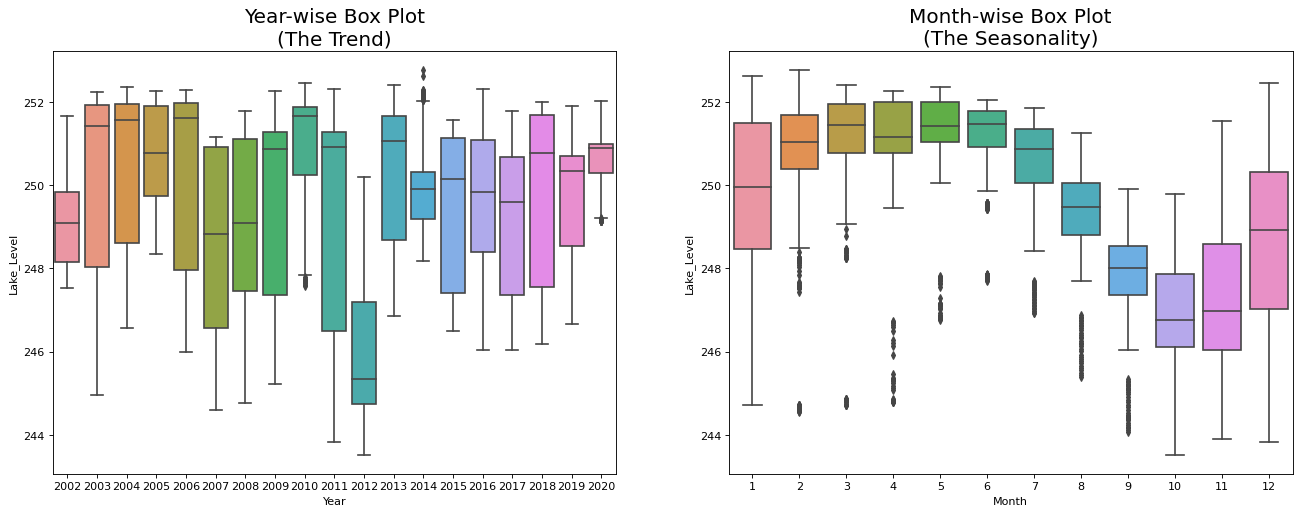

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Lake_Level', data=data, ax=axes[0])
sns.boxplot(x='Month', y='Lake_Level', data=data)
# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

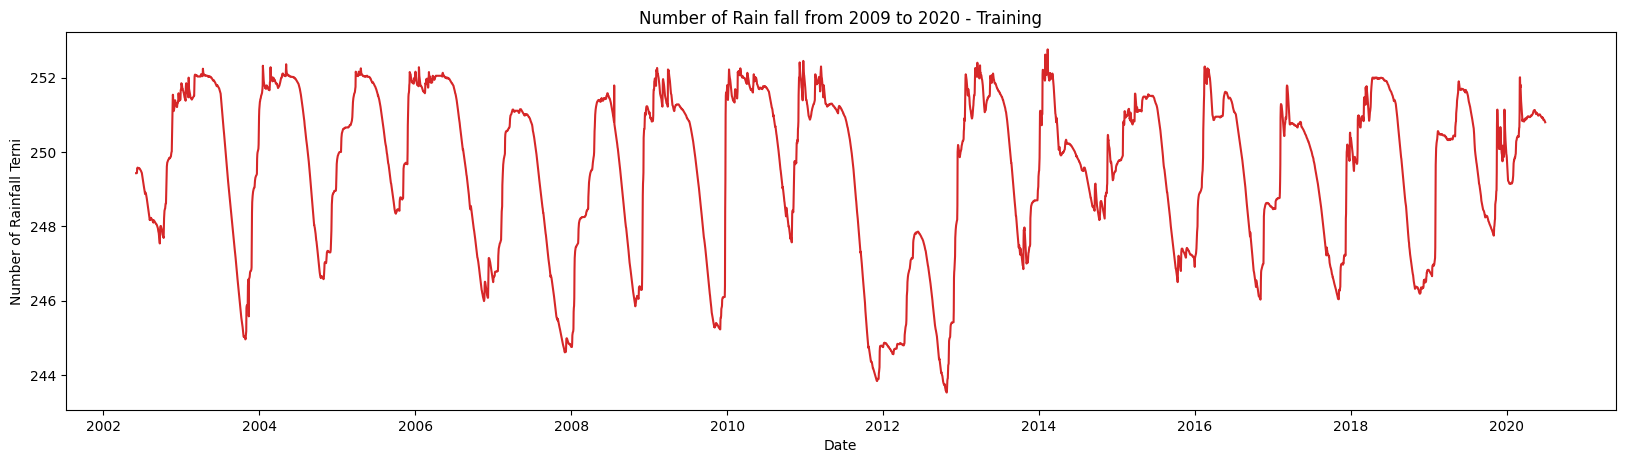

In [ ]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Number of Rainfall Terni', dpi=100, color="blue"):
  plt.figure(figsize=(20,5), dpi=dpi)
  plt.plot(x, y, color=color)
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.show()
    
plot_df(x=data['Date'], y=data['Lake_Level'], title='Number of Rain fall from 2009 to 2020 - Training', color="tab:red")

In [ ]:
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
Augmented_Dickey_Fuller_Test_func(data['Lake_Level'], 'Lake_Level')

Results of Dickey-Fuller Test for column: Lake_Level
Test Statistic         -6.880991e+00
p-value                 1.433634e-09
Critical Value (1%)    -3.431346e+00
Critical Value (5%)    -2.861980e+00
Critical Value (10%)   -2.567004e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


* ADF test < Critical value
* p-value < singsignificance level (0.05)

**Data is stationary**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

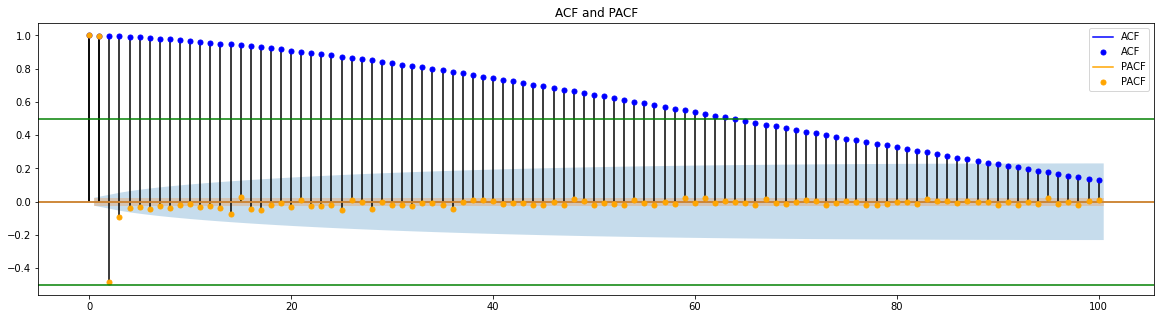

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
plot_acf(data['Lake_Level'],lags=100, ax=ax, color = 'blue', label='ACF')
plot_pacf(data['Lake_Level'],lags=100, ax=ax, color = 'orange', label='PACF')
plt.axhline(y=0.5, color="green")
plt.axhline(y=-0.5, color="green")
ax.set_title("ACF and PACF")
ax.legend(loc ='best')

The autocorrelations are positive for many number of lags -> **the series needs further differencing**

Text(0.5, 0.98, 'ACF and PACF')

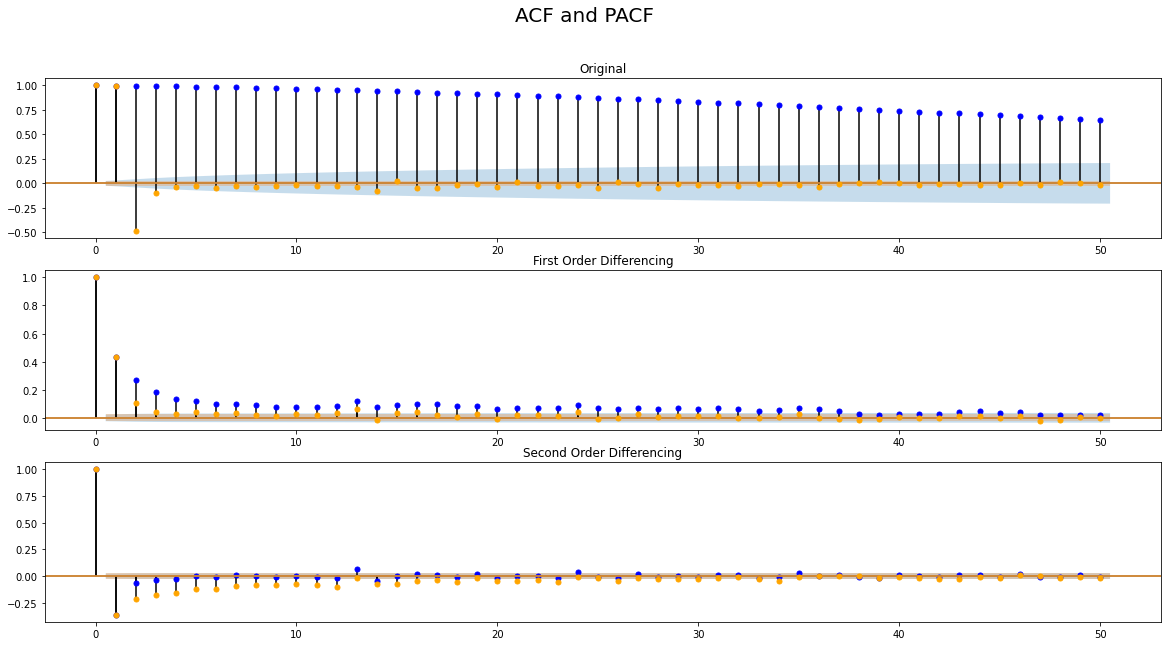

In [ ]:
f, ax = plt.subplots(3,1, figsize=(20, 10))

plot_acf(data['Lake_Level'],lags=50, ax=ax[0], color = 'blue', label = 'ACF')
plot_pacf(data['Lake_Level'],lags=50, ax=ax[0], color = 'orange', label = 'PACF')
ax[0].set_title("Original")

plot_acf(data['Lake_Level'].diff().dropna(),lags=50, ax=ax[1], color = 'blue', label = 'ACF')
plot_pacf(data['Lake_Level'].diff().dropna(),lags=50, ax=ax[1], color = 'orange', label = 'PACF')
ax[1].set_title("First Order Differencing")

plot_acf(data['Lake_Level'].diff().diff().dropna(),lags=50, ax=ax[2], color = 'blue', label = 'ACF')
plot_pacf(data['Lake_Level'].diff().diff().dropna(),lags=50, ax=ax[2], color = 'orange', label = 'PACF')
ax[2].set_title("Second Order Differencing")

f.suptitle("ACF and PACF",fontsize = 20)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
train = data['Lake_Level'][:6500]
test = data['Lake_Level'][6500:]


In [ ]:
rmse_dict = dict()

## AR model



In [ ]:
aic = list()
for p in range(1,10):
  ar_model = ARMA(data['Lake_Level'].diff().fillna(0), order=(p,0,0))
  ar_model = ar_model.fit()
  aic.append(ar_model.aic)
  print(f'P : {p} - AIC : {ar_model.aic}')
print('Min of AIC: ',min(aic))
p = aic.index(min(aic))+1
print('---> P =',p)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


P : 1 - AIC : -12472.494476707736
P : 2 - AIC : -12544.047103227935
P : 3 - AIC : -12551.964573526831
P : 4 - AIC : -12555.80200982491
P : 5 - AIC : -12563.237610331187
P : 6 - AIC : -12565.31878289011
P : 7 - AIC : -12570.222015841719
P : 8 - AIC : -12571.00126417933
P : 9 - AIC : -12570.154471525573
Min of AIC:  -12571.00126417933
---> P = 8


In [ ]:
#AR model 
def ARmodel(train, test,p):

  # First Order Differencing
  train = train.diff().fillna(0)
  test = test.diff().fillna(0)

  #model
  ar_model = ARMA(train, order=(p,0))
  ar_model = ar_model.fit()
  # print('Coefficients: %s' % ar_model.params)
  # print(ma_model.summary())

  # make predictions
  predictions = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
  # for i in range(len(predictions)):
  #   print('predicted=%f, expected=%f' % (predictions[i], test[i]))

  # fig = plt.subplots(figsize=(20,10))
  # plt.plot(predictions, color="green")
  # plt.plot(test,color="blue")
  # plt.show()
  rmse = np.sqrt(mean_squared_error(test, predictions))
  print('Test RMSE: %f' % rmse)
  return rmse

ar_rmse = ARmodel(train,test,p)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test RMSE: 0.013232


In [ ]:
rmse_dict[f'AR Model({p})'] = ar_rmse

## MA model

In [ ]:
aic_ma =[]
for q in range(0,10):
  ma_model = ARMA(data['Lake_Level'].diff().fillna(0), order=(0,q))
  ma_model = ma_model.fit()
  aic_ma.append(ma_model.aic)
  print(f'Q : {q} - AIC : {ma_model.aic}')
print('Min of AIC: ',min(aic_ma))
q = aic_ma.index(min(aic_ma)
print('Q : ',q))

Q : 0 - AIC : -11121.119614525425
Q : 1 - AIC : -12133.477055142474
Q : 2 - AIC : -12398.581473392249
Q : 3 - AIC : -12482.830631335542
Q : 4 - AIC : -12508.986510220995
Q : 5 - AIC : -12527.127859053264
Q : 6 - AIC : -12533.891457643385
Q : 7 - AIC : -12542.896313083646
Q : 8 - AIC : -12550.052288097297
Q : 9 - AIC : -12550.81809321342
Min of AIC:  -12550.81809321342
Q :  9


In [ ]:
def MAmodel(train,test,q):
  # First Order Differencing
  train = train.diff().fillna(0)
  test = test.diff().fillna(0)

  #model
  ma_model = ARMA(train, order=(0,q))
  ma_model = ma_model.fit()
  # print('Coefficients: %s' % ma_model.params)
  # print(ma_model.summary())

  # make predictions
  predictions = ma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
  # for i in range(len(predictions)):
  #   print('predicted=%f, expected=%f' % (predictions[i], test[i]))

  # fig = plt.subplots(figsize=(20,10))
  # plt.plot(predictions, color="green")
  # plt.plot(test,color="blue")
  # plt.show()
  rmse = np.sqrt(mean_squared_error(test, predictions))
  print('Test RMSE: %f' % rmse)
  return rmse
  
ma_rmse = MAmodel(train,test,9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test RMSE: 0.013216


In [ ]:
rmse_dict[f'MA Model({q})'] = ma_rmse

## ARMA

In [ ]:
aic_arma = []
for p in range(0,10):
  for q in range(0,2):
    arma_model = ARMA(data['Lake_Level'].diff().fillna(0), order=(p, q))
    arma_model = arma_model.fit(disp=False)
    aic_arma.append(arma_model.aic)
    print(f'P : {p}, Q : {q} - AIC : {arma_model.aic}')
print('Min of AIC: ',min(aic_arma))
p = (aic_arma.index(min(aic_arma)))//2
q = (aic_arma.index(min(aic_arma)))%2
print(f'P: {p}, Q : {q}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


P : 0, Q : 0 - AIC : -11121.119614525425
P : 0, Q : 1 - AIC : -12133.477055142474
P : 1, Q : 0 - AIC : -12472.494476707736
P : 1, Q : 1 - AIC : -12557.244393390618
P : 2, Q : 0 - AIC : -12544.047103227935
P : 2, Q : 1 - AIC : -12606.63695213573
P : 3, Q : 0 - AIC : -12551.964573526831
P : 3, Q : 1 - AIC : -12623.763743083648
P : 4, Q : 0 - AIC : -12555.80200982491
P : 4, Q : 1 - AIC : -12621.797248641196
P : 5, Q : 0 - AIC : -12563.237610331187
P : 5, Q : 1 - AIC : -12620.39688096619
P : 6, Q : 0 - AIC : -12565.31878289011
P : 6, Q : 1 - AIC : -12618.398241678537
P : 7, Q : 0 - AIC : -12570.222015841719
P : 7, Q : 1 - AIC : -12617.175313107658
P : 8, Q : 0 - AIC : -12571.00126417933
P : 8, Q : 1 - AIC : -12615.20494762656
P : 9, Q : 0 - AIC : -12570.154471525573
P : 9, Q : 1 - AIC : -12614.320637868514
Min of AIC:  -12623.763743083648
P: 3, Q :  1


In [ ]:
def ARMAmodel(train, test,p,q):
  # First Order Differencing
  train = train.diff().fillna(0)
  test = test.diff().fillna(0)

  # fit model
  arma_model = ARMA(train, order=(p, q))
  arma_model = arma_model.fit(disp=False)
  # print(ar_model.summary())

  predictions = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
  # for i in range(len(predictions)):
  #   print('predicted=%f, expected=%f' % (predictions[i], test[i]))

  # fig = plt.subplots(figsize=(20,10))
  # plt.plot(predictions, color="green")
  # plt.plot(test,color="blue")
  # plt.show()
  rmse = np.sqrt(mean_squared_error(test, predictions))
  print('Test RMSE: %f' % rmse)
  return rmse

arma_rmse = ARMAmodel(train,test,3,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test RMSE: 0.013288


In [ ]:
rmse_dict[f'ARMA Model({p},{q})'] = arma_rmse

##ARIMA

In [ ]:
aic_arima = []
d=1
for p in range(0,10):
  for q in range(0,2):
    arima_model = ARIMA(data['Lake_Level'].diff().fillna(0), order=(p,d,q))
    arima_model = arima_model.fit(disp=False)
    aic_arima.append(arima_model.aic)
    print(f'P : {p}, D : {d}, Q : {q} - AIC : {arima_model.aic}')
print('Min of AIC: ',min(aic_arima))
p = (aic_arima.index(min(aic_arima)))//2
q = (aic_arima.index(min(aic_arima)))%2
print(f'P: {p}, D : {d}, Q : {q}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


P : 0, D : 1, Q : 0 - AIC : -10259.44243098639
P : 0, D : 1, Q : 1 - AIC : -11951.138780764999
P : 1, D : 1, Q : 0 - AIC : -11173.847891122412
P : 1, D : 1, Q : 1 - AIC : -12538.863332096294
P : 2, D : 1, Q : 0 - AIC : -11495.669711622606
P : 2, D : 1, Q : 1 - AIC : -12563.377715599003
P : 3, D : 1, Q : 0 - AIC : -11694.376290432363
P : 3, D : 1, Q : 1 - AIC : -12561.548373348338
P : 4, D : 1, Q : 0 - AIC : -11853.62561178084
P : 4, D : 1, Q : 1 - AIC : -12559.576550691232
P : 5, D : 1, Q : 0 - AIC : -11954.036923873184
P : 5, D : 1, Q : 1 - AIC : -12557.998494791635
P : 6, D : 1, Q : 0 - AIC : -12044.157997501112
P : 6, D : 1, Q : 1 - AIC : -12556.065790409757
P : 7, D : 1, Q : 0 - AIC : -12102.430891776938
P : 7, D : 1, Q : 1 - AIC : -12554.285335981658
P : 8, D : 1, Q : 0 - AIC : -12143.467672248087
P : 8, D : 1, Q : 1 - AIC : -12552.43729334537
P : 9, D : 1, Q : 0 - AIC : -12191.267980098233
P : 9, D : 1, Q : 1 - AIC : -12551.47834319486
Min of AIC:  -12563.377715599003
P: 2, D : 1

In [ ]:
train = data['Lake_Level'][:6500]
test = data['Lake_Level'][6500:]

def ARIMAmodel(train, test,p,d,q):
  # First Order Differencing
  train = train.diff().fillna(0)
  test = test.diff().fillna(0)

  # fit model
  arima_model = ARIMA(train, order=(p,d, q))
  arima_model = arima_model.fit(disp=False)
  # print(arima_model.summary())

  predictions = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
  # for i in range(len(predictions)):
  #   print('predicted=%f, expected=%f' % (predictions[i], test[i]))

  # fig = plt.subplots(figsize=(20,10))
  # plt.plot(predictions, color="green")
  # plt.plot(test,color="blue")
  # plt.show()
  rmse = np.sqrt(mean_squared_error(test, predictions))
  print('Test RMSE: %f' % rmse)
  return rmse

arima_rmse = ARIMAmodel(train,test,p,d,q)

Test RMSE: 0.013343


In [ ]:
rmse_dict[f'ARIMA Model({p},{d},{q})'] = arima_rmse

In [ ]:
rmse_dict

{'AR Model(8)': 0.01323150270411612,
 'MA Model(9)': 0.01321597628435702,
 'ARMA Model(3,1)': 0.013288096800734752,
 'ARIMA Model(2,1,1)': 0.013343486443902106}

In [ ]:
print(f"Model {min(rmse_dict, key=rmse_dict.get)} have min RMSE = {min(rmse_dict.values())}")

Model MA Model(9) have min RMSE = 0.01321597628435702
